In [28]:
import librosa
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os

music = 'OAF_back_fear.wav'
signal,sr = librosa.load(music)

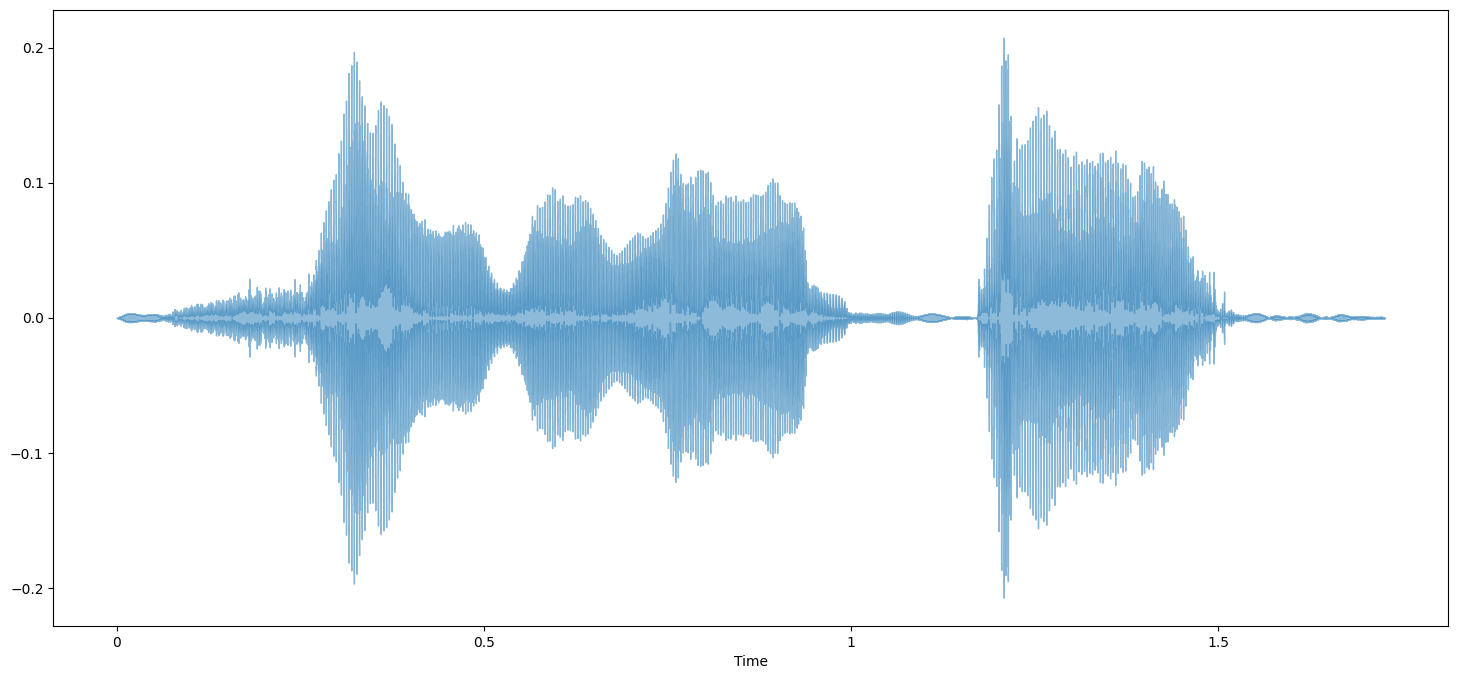

In [7]:

# plot waveform
plt.figure(figsize=(18, 8))
librosa.display.waveshow(y=signal, sr=sr, alpha=0.5)
plt.show()

In [8]:
len(signal)

38084

In [13]:
d=1/sr
print(d)

4.5351473922902495e-05


[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 1.72702948e+00
 1.72707483e+00 1.72712018e+00]


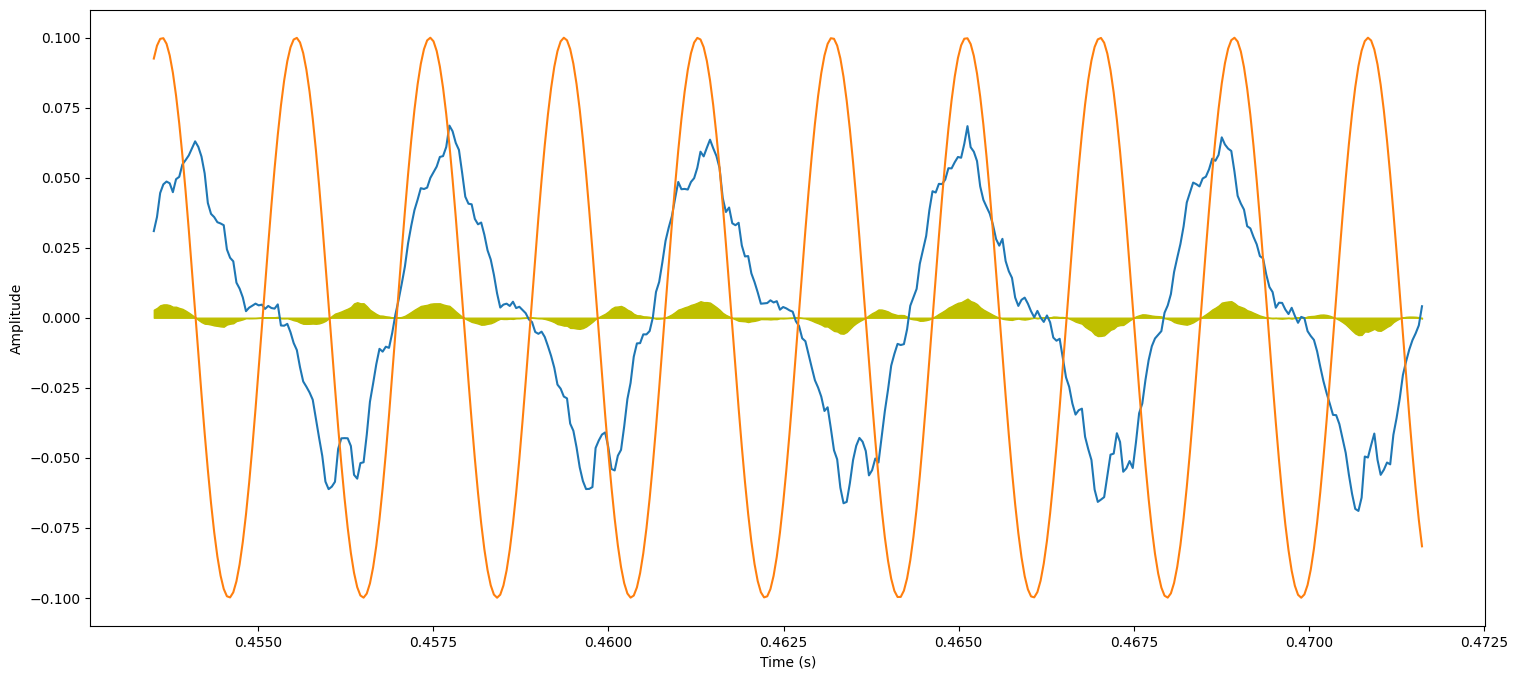

In [27]:
f = 523
phase = 0
samples = range(len(signal))

t = librosa.samples_to_time(samples, sr=sr)

print(t)

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))
plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.plot(t[10000:10400],sin[10000:10400])
plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [31]:
music = 'OAF_back_fear.wav'
ipd.Audio(music)

In [36]:
signal,sr = librosa.load(music)
signal.shape,sr

((38084,), 22050)

In [42]:
signal_fft = np.fft.fft(signal)
# it gives us a complex number
signal_fft[0]

(0.058016049569917905+1.4988010832439613e-15j)

In [44]:
magnitude_signal = np.abs(signal_fft)
magnitude_signal[0]

0.058016049569917905

In [60]:
def plot_spectrum(signal,sr,title,f_ratio):
    fft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(fft)
    
    # plotting the spectrum
    
    plt.figure(figsize=(18,5))
    frequency = np.linspace(0,sr,len(magnitude_spectrum))
    limit = int(len(frequency) * f_ratio)
    plt.plot(frequency[0:limit],magnitude_spectrum[0:limit])
    plt.xlabel("Frequency")
    plt.title(title)
    plt.show()

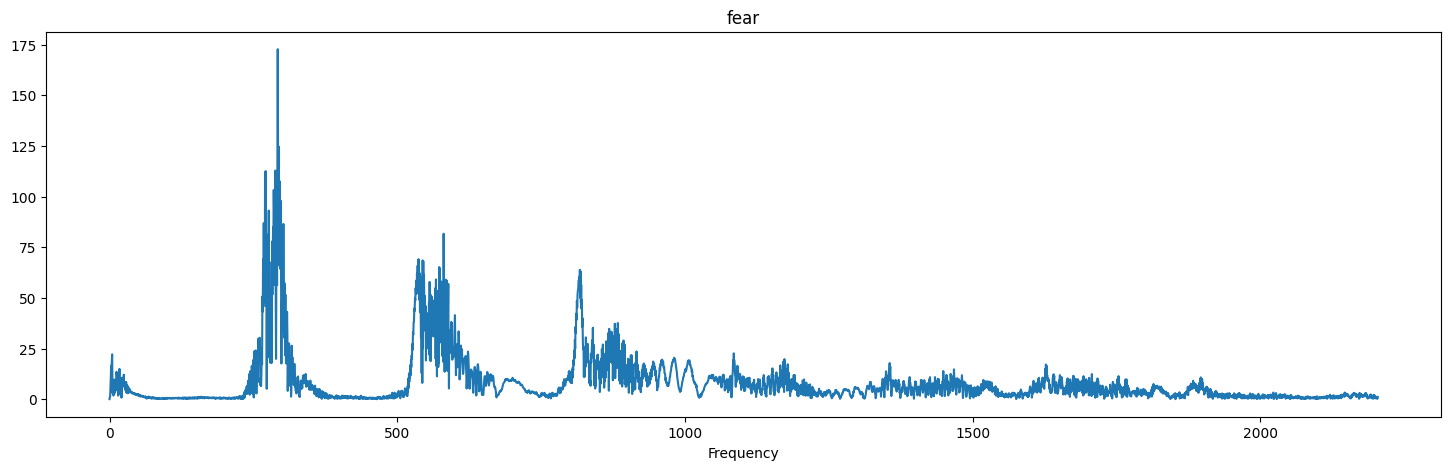

In [62]:
plot_spectrum(signal,sr,"fear",0.1)

In [67]:
# Spectograms
FRAME_SIZE = 2048
HOP_SIZE = 512
frames = (len(signal)-2048)/512
frames+=1
print("#frames",frames)

stft = librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)
stft.shape

#frames 71.3828125


(1025, 75)

In [79]:
y_scale = np.abs(stft) ** 2
y_scale.shape

(1025, 75)

In [75]:
def plot_spectogram(Y,sr,hop_length,y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y,sr=sr,hop_length=hop_length,x_axis="time",y_axis=y_axis)

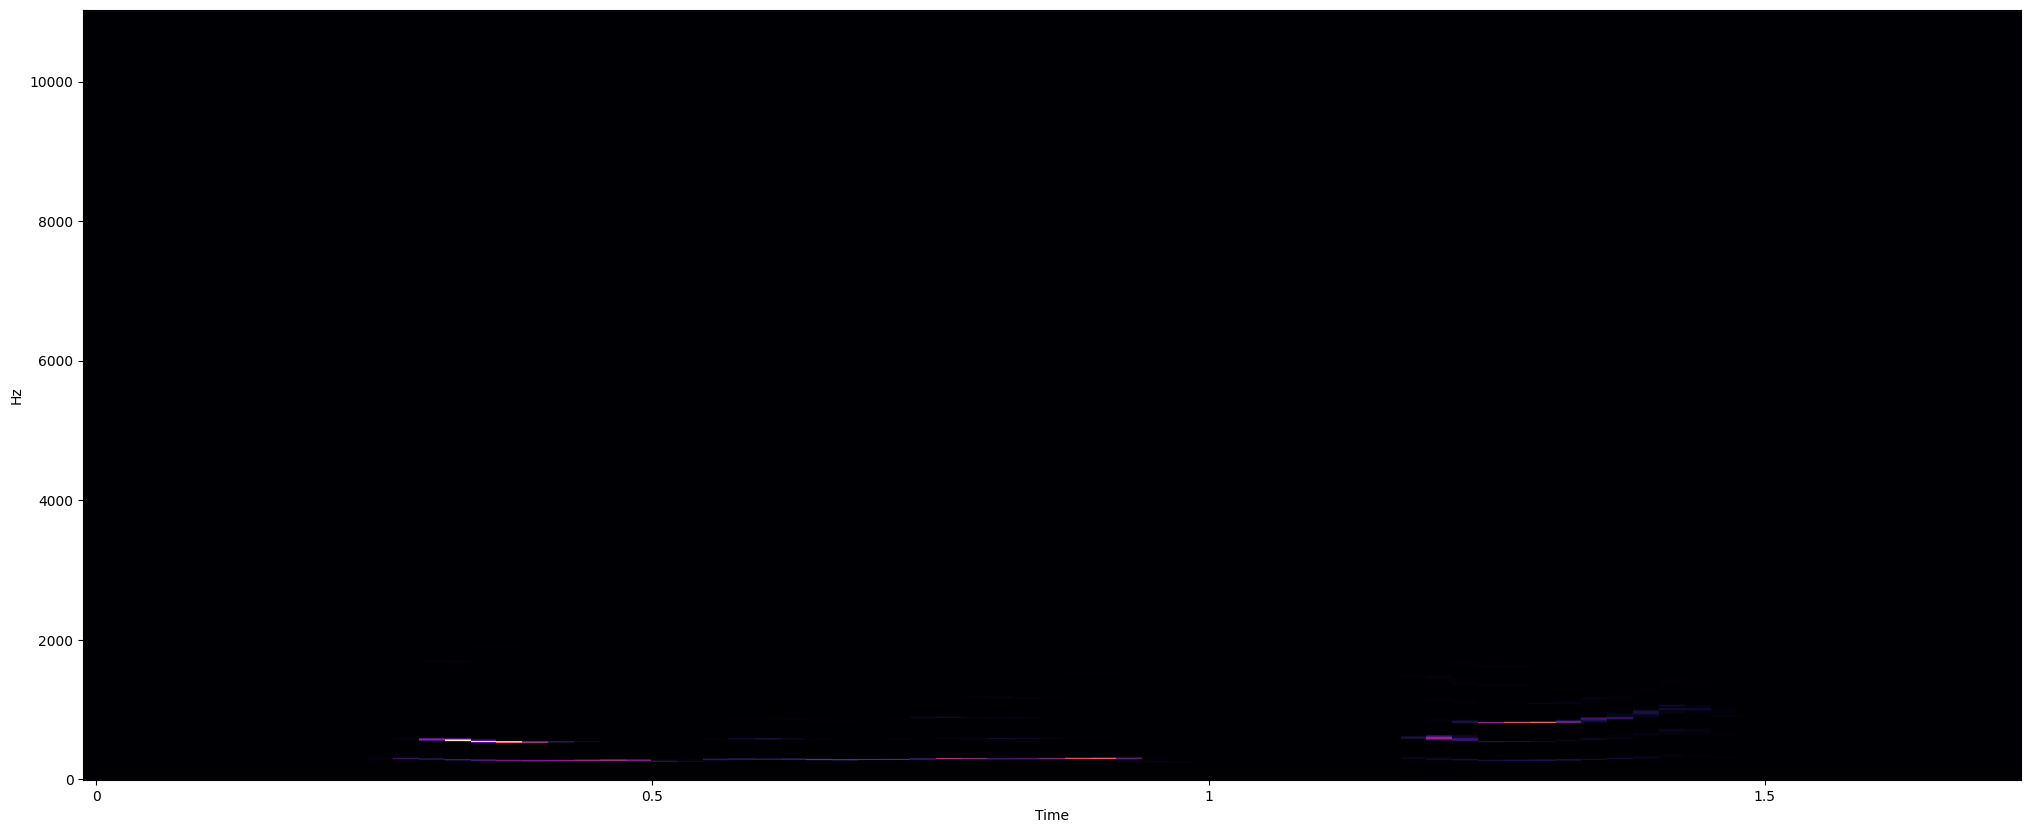

In [80]:
plot_spectogram(y_scale,sr,HOP_SIZE)

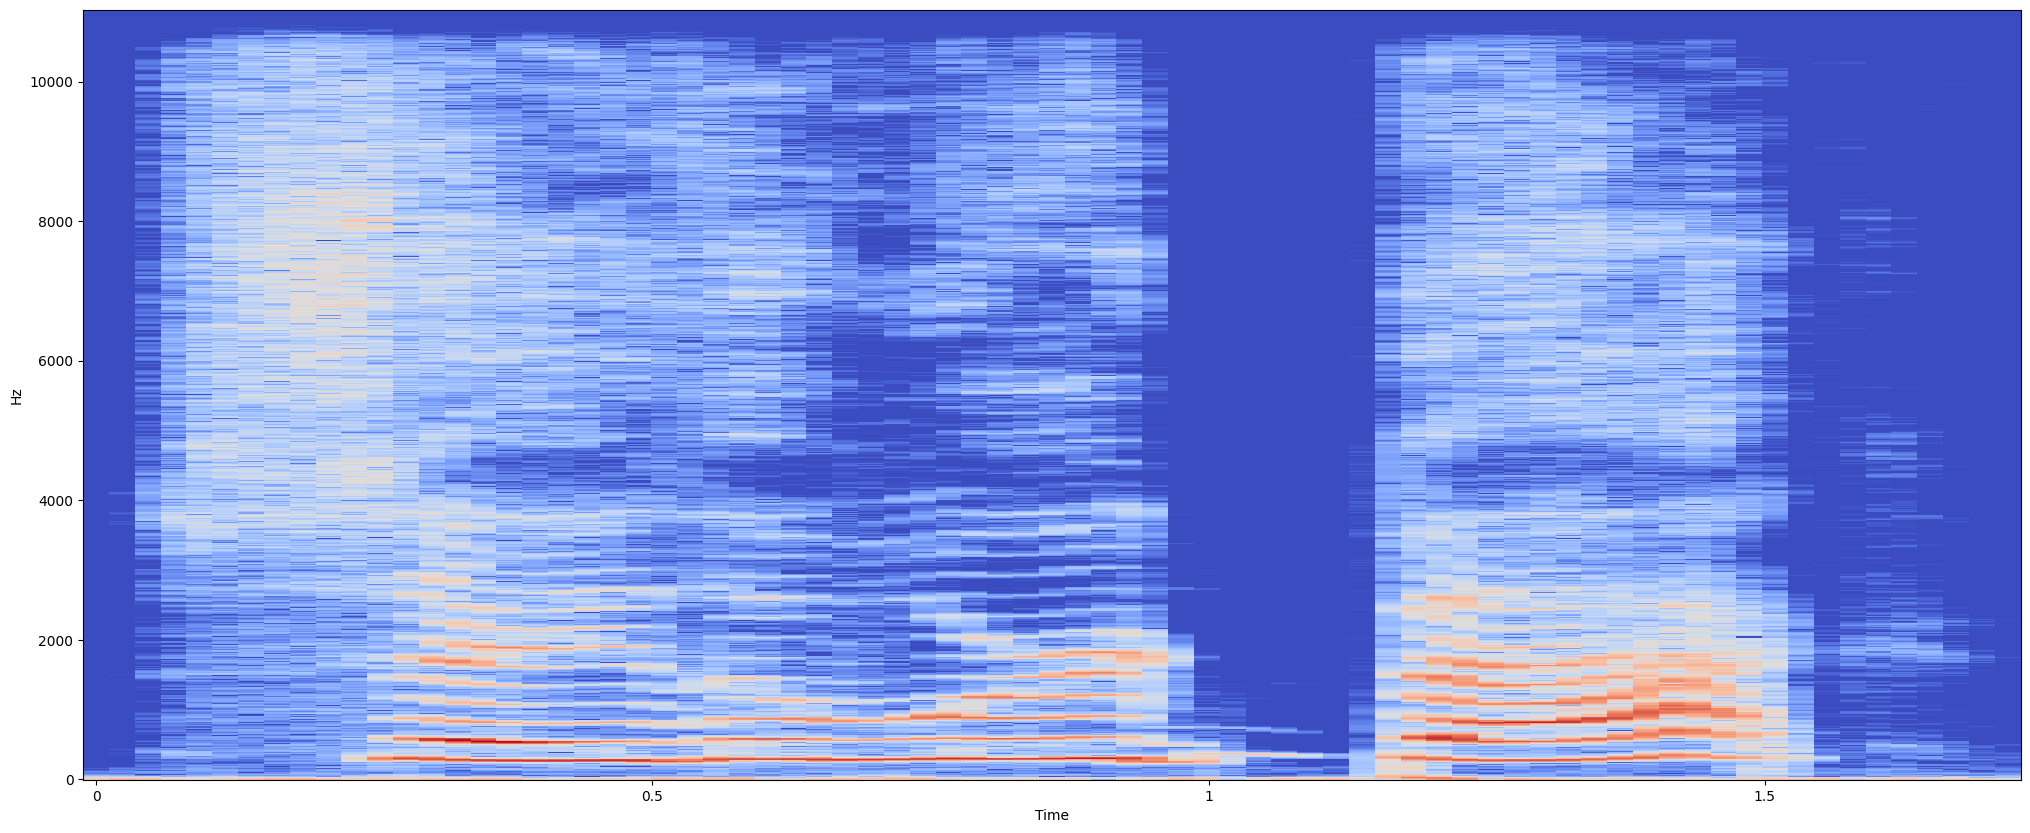

In [83]:
y_log_scale = librosa.power_to_db(y_scale)
plot_spectogram(y_log_scale,sr,HOP_SIZE)

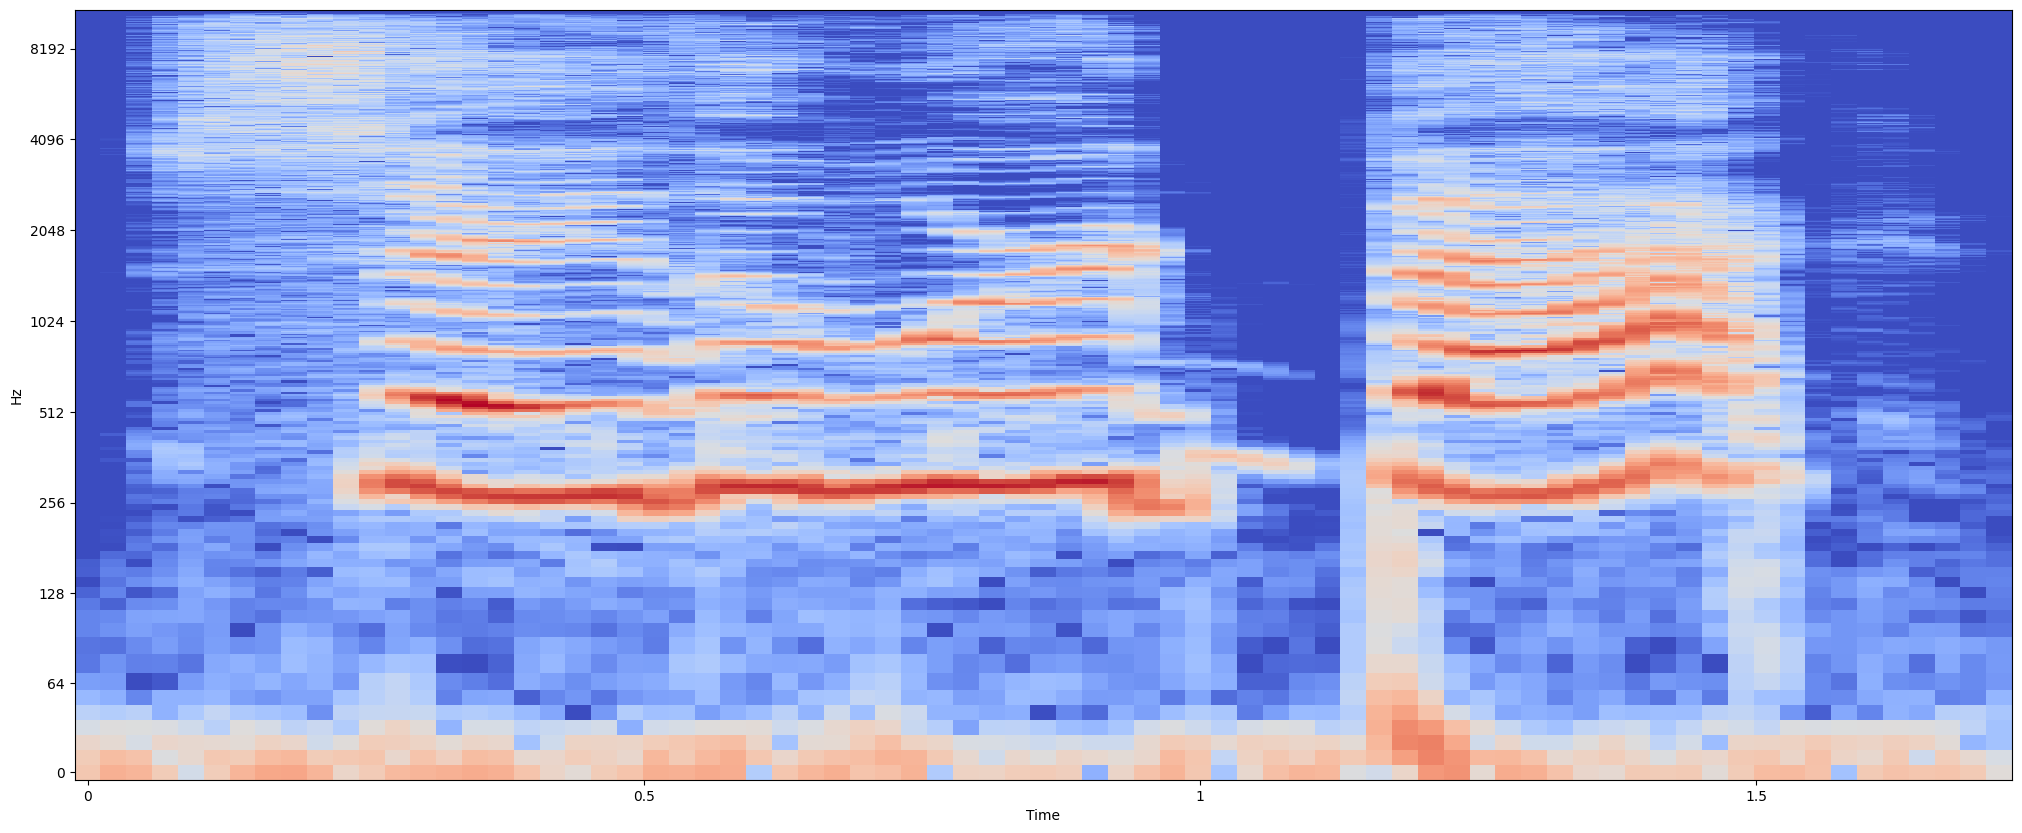

In [84]:
plot_spectogram(y_log_scale,sr,HOP_SIZE,"log")

In [86]:
filter_banks = librosa.filters.mel(n_fft=2048,sr=sr,n_mels=10)
filter_banks.shape

(10, 1025)